# Import Section

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data Set
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

**Data Set Information**:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.



**Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.**

In [16]:
cols=["gender","age","height","weight","family_history","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"]
df = pd.read_csv("../datasets/ObesityDataSet_Fixed.csv", names=cols)
df.replace({'gender': {'Male': 1, 'Female': 0},
           'family_history': {'yes': 1, 'no': 0},
           'FAVC': {'yes': 1, 'no': 0},
           'CAEC': {'Always': 3, 'Frequently': 2, "Sometimes": 1,'no':0},
           'SMOKE': {'yes': 1, 'no': 0},
           'SCC': {'yes': 1, 'no': 0},
           'CALC': {'Always':3, 'Frequently': 2, 'Sometimes': 1,'no': 0},
           'MTRANS': {'Walking': 4,'Bike': 3, 'Public_Transportation': 2,'Motorbike': 1, 'Automobile': 0},
           'NObeyesdad': {'Obesity_Type_III': 6,'Obesity_Type_II': 5,'Obesity_Type_I': 4, 'Overweight_Level_II': 3,'Overweight_Level_I': 2, 'Normal_Weight': 1,'Insufficient_Weight': 0}
          }, inplace=True)
                     
df.describe()
df


,gender,age,height,weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,0,21,162,64,1,0,2,3,1,0,2,0,0,1,0,2,1
2,0,21,152,56,1,0,3,3,1,1,3,1,3,0,1,2,1
3,1,23,180,77,1,0,2,3,1,0,2,0,2,1,2,2,1
4,1,27,180,87,0,0,3,3,1,0,2,0,2,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0,21,171,131,1,1,3,3,1,0,2,0,2,1,1,2,6
2108,0,22,175,134,1,1,3,3,1,0,2,0,1,1,1,2,6
2109,0,23,175,134,1,1,3,3,1,0,2,0,1,1,1,2,6
2110,0,24,174,133,1,1,3,3,1,0,3,0,1,1,1,2,6


# Train/test Data set

In [17]:
X_features =["gender","age","height","weight","family_history","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS" ]
x_i=df.iloc[1:, 0:16].values.astype(int)
y_i=df.iloc[1:, 16].values.astype(int)

# Feature Scaling
the data so the data will be normalized the range
we do this because the range in each features is different

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(x_i)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_i,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  1  47  53 134   1   1   2   3   3   1   2   1   3   2   3   4]
Peak to Peak range by column in Normalized X:[2.00014026 7.39508553 5.67778357 5.1178436  2.58962854 3.12211842
 3.42602498 3.70604574 6.40433817 6.99989711 2.90506497 4.79971103
 3.35102068 2.96802451 5.82099335 4.37793121]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y_i, test_size=0.3, random_state=42)

# Find the insignificant features

**1st Method (Select KBest)**

In [20]:
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(x_i, y_i)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_features)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(16, 'Score'))

          Features         Score
3           weight  14184.241742
1              age    639.181914
0           gender    324.978359
11             SCC    117.429254
4   family_history    113.435378
2           height    106.945709
12             FAF     78.578007
15          MTRANS     77.233671
8             CAEC     76.273289
14            CALC     67.677522
6             FCVC     61.169145
7              NCP     34.629411
9            SMOKE     31.467977
13             TUE     30.969041
5             FAVC     27.081298
10            CH2O     23.809716


**2nd method (ExtraTressClassifier)**

[0.08135298 0.08841655 0.08639981 0.2943658  0.04759432 0.02617049
 0.05341679 0.05193087 0.03997244 0.00458019 0.03695339 0.0132829
 0.04017556 0.03808709 0.0553638  0.04193701]


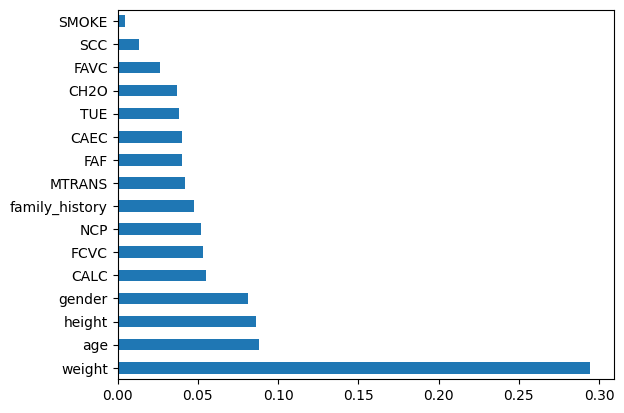

In [21]:
model = ExtraTreesClassifier()
model.fit(x_i,y_i)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_features)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()


# SVM(version 1.0)

In [22]:

from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear kernel

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [23]:
# import scikit-learn metrics modue for accuracy calculation
from sklearn import metrics
from sklearn.metrics import r2_score


# Model Accuracy : how often is the classifier correct?
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy 0.9479495268138801
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        86
           1       0.99      0.83      0.90        93
           2       0.86      0.94      0.90        88
           3       0.94      0.91      0.92        79
           4       1.00      0.96      0.98       102
           5       0.96      1.00      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# lg_model = LogisticRegression(max_iter=1000)  # Increase the number of iterations to 1000
# lg_model = lg_model.fit(X_train, y_train)

In [26]:
# y_pred = lg_model.predict(X_test)
# print(classification_report(y_test, y_pred))

*  Obesity_Type_III    = 6
*  Obesity_Type_II     = 5
*  Obesity_Type_I      = 4
*  Overweight_Level_II = 3
*  Overweight_Level_I  = 2
*  Normal_Weight       = 1
*  Insufficient_Weight = 0